## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

As Q2 increases, what is the affect on left handedness?

Does engnat have a positive or negative relationship to left handedness?

Which of all the Q's has the most impact on left handedness?

Answer:

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
data = pd.read_csv('./data.csv', sep='\t')
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,3,5,4,5,2,4,2,2,2,5,...,US,1,1,18,2,1,1,6,2,1
4180,1,5,1,5,1,4,2,4,1,4,...,US,1,1,18,2,2,1,3,2,1
4181,3,2,2,4,5,4,5,2,2,5,...,PL,2,2,22,2,1,1,6,1,1
4182,1,3,4,5,1,3,3,1,1,3,...,US,2,1,16,1,2,5,1,1,1


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: 1) Remove all the column names upon collection, but of course, save the key somewhere safe. 2) Anonymise the responses. 3) Destroy the original copies after they have been secured on a private server in encryption.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [3]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [16]:
data.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      4184 non-null   int64
 1   Q2      4184 non-null   int64
 2   Q3      4184 non-null   int64
 3   Q4      4184 non-null   int64
 4   Q5      4184 non-null   int64
 5   Q6      4184 non-null   int64
 6   Q7      4184 non-null   int64
 7   Q8      4184 non-null   int64
 8   Q9      4184 non-null   int64
 9   Q10     4184 non-null   int64
 10  Q11     4184 non-null   int64
 11  Q12     4184 non-null   int64
 12  Q13     4184 non-null   int64
 13  Q14     4184 non-null   int64
 14  Q15     4184 non-null   int64
 15  Q16     4184 non-null   int64
 16  Q17     4184 non-null   int64
 17  Q18     4184 non-null   int64
 18  Q19     4184 non-null   int64
 19  Q20     4184 non-null   int64
dtypes: int64(20)
memory usage: 653.9 KB


In [17]:
data.iloc[:,20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q21     4184 non-null   int64
 1   Q22     4184 non-null   int64
 2   Q23     4184 non-null   int64
 3   Q24     4184 non-null   int64
 4   Q25     4184 non-null   int64
 5   Q26     4184 non-null   int64
 6   Q27     4184 non-null   int64
 7   Q28     4184 non-null   int64
 8   Q29     4184 non-null   int64
 9   Q30     4184 non-null   int64
 10  Q31     4184 non-null   int64
 11  Q32     4184 non-null   int64
 12  Q33     4184 non-null   int64
 13  Q34     4184 non-null   int64
 14  Q35     4184 non-null   int64
 15  Q36     4184 non-null   int64
 16  Q37     4184 non-null   int64
 17  Q38     4184 non-null   int64
 18  Q39     4184 non-null   int64
 19  Q40     4184 non-null   int64
dtypes: int64(20)
memory usage: 653.9 KB


In [18]:
data.iloc[:,40:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q41          4184 non-null   int64 
 1   Q42          4184 non-null   int64 
 2   Q43          4184 non-null   int64 
 3   Q44          4184 non-null   int64 
 4   introelapse  4184 non-null   int64 
 5   testelapse   4184 non-null   int64 
 6   country      4184 non-null   object
 7   fromgoogle   4184 non-null   int64 
 8   engnat       4184 non-null   int64 
 9   age          4184 non-null   int64 
 10  education    4184 non-null   int64 
 11  gender       4184 non-null   int64 
 12  orientation  4184 non-null   int64 
 13  race         4184 non-null   int64 
 14  religion     4184 non-null   int64 
 15  hand         4184 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 523.1+ KB


In [9]:
data.iloc[:,0:20].describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,2.748805,2.852772,2.657505,3.334130,3.168021,2.930210,2.564771,3.424952,2.928537,3.639818
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,1.443078,1.556284,1.559575,1.522866,1.501683,1.575544,1.619010,1.413236,1.493122,1.414569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
data.iloc[:,20:40].describe()

,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,2.867591,3.595124,3.861138,3.337237,1.999761,3.001434,2.730641,2.624044,2.543738,2.894359,3.002151,2.869503,2.741874,3.022228,3.074092,2.610660,3.465344,2.798757,2.569312,2.984226
std,1.360858,1.354475,1.291425,1.426095,1.290747,1.480610,1.485883,1.481709,1.611428,1.477968,1.420032,1.659141,1.405670,1.562694,1.546400,1.409707,1.521460,1.413584,1.621772,1.483752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,3.000000,4.000000,4.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,3.000000
75%,4.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
data.iloc[:,40:].describe()

,Q41,Q42,Q43,Q44,introelapse,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,3.385277,2.704828,2.676386,2.736616,347.808556,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.423055,1.544345,1.523097,1.471845,5908.901681,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,6.000000,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,12.000000,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,35.000000,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,252063.000000,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


<AxesSubplot:>

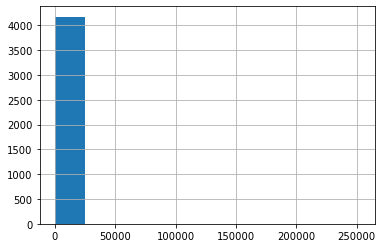

In [21]:
data['introelapse'].hist()

<AxesSubplot:>

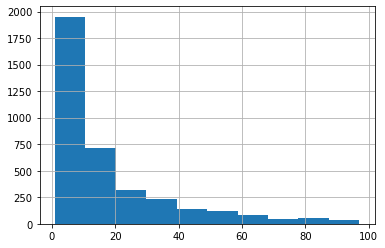

In [39]:
data['introelapse'][data['introelapse'] < 100].hist()

<AxesSubplot:>

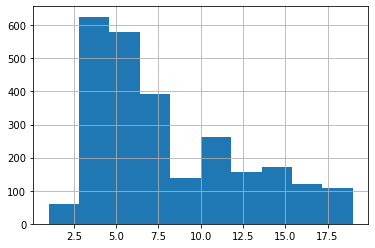

In [40]:
data['introelapse'][data['introelapse'] < 20].hist()

<AxesSubplot:>

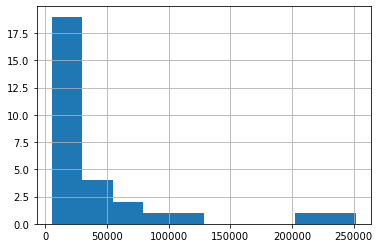

In [36]:
data['introelapse'][data['introelapse'] > 5000].hist()  # dont know enough abot what they are measuring to know if this is an ourlier or not

<AxesSubplot:>

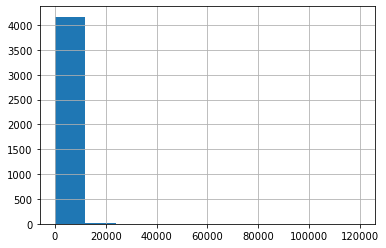

In [51]:
data['testelapse'].hist();  # similar to introelapse ... unclear if this is abnormal or not. There are dozens outside of the range. I assume it is an outlier... but cant be certain

<AxesSubplot:>

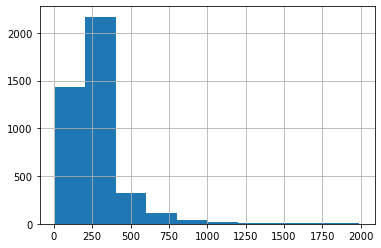

In [52]:
data[data['testelapse']<2000]['testelapse'].hist()

<AxesSubplot:xlabel='engnat', ylabel='Count'>

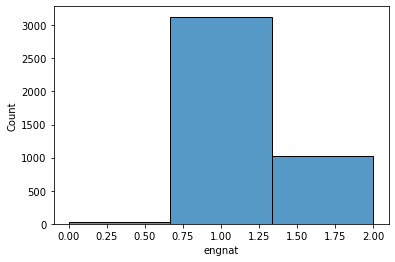

In [56]:
sns.histplot(data['engnat'], bins=3)    # nothing suspicous

In [61]:
data['age'].sort_values(ascending=False)    # 3 clear outliers here... suppose it is possible somebody could be 123...unlikely

2690    23763
2137      409
2075      123
1736       86
2101       86
        ...  
3828       13
76         13
1642       13
10         13
1511       13
Name: age, Length: 4184, dtype: int64

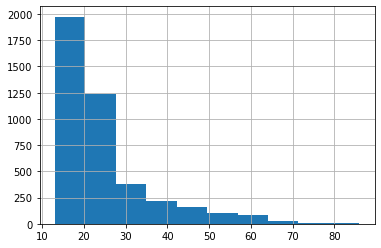

In [148]:
data['age'][data['age'] < 100].hist();

In [161]:
data = data[data['age'] < 100].copy()

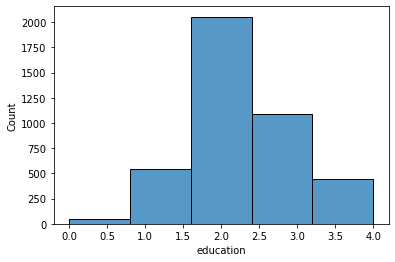

In [150]:
sns.histplot(data['education'], bins=5); # looks good

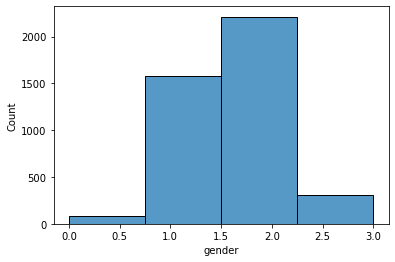

In [151]:
sns.histplot(data['gender'], bins=4); # looks reasonable, not sure what exact question was asked, but assuming we're all set here.

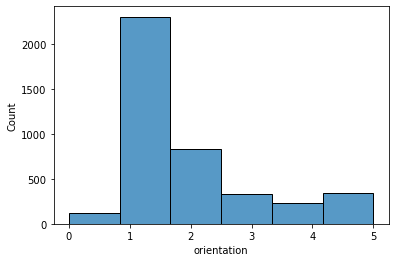

In [152]:
sns.histplot(data['orientation'], bins=6);  # looks good

<AxesSubplot:xlabel='race', ylabel='Count'>

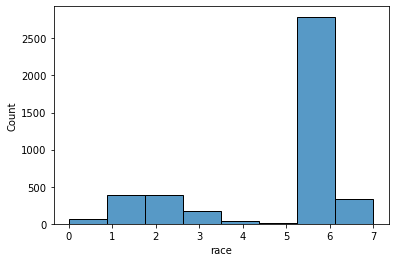

In [74]:
sns.histplot(data['race'], bins=8);  # looks ok

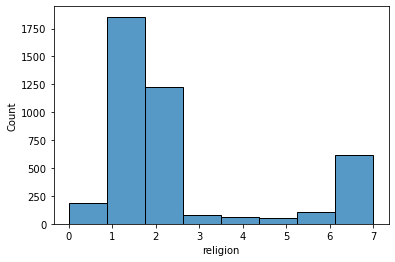

In [76]:
sns.histplot(data['religion'], bins=8); # looks good

<AxesSubplot:>

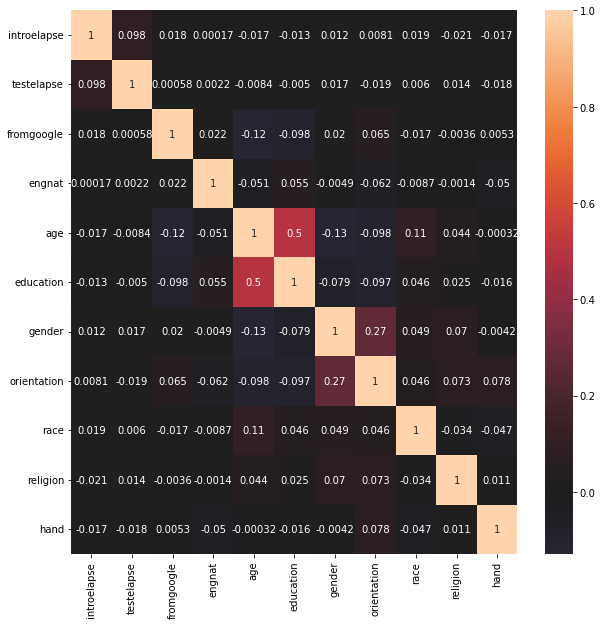

In [65]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.iloc[:,44:].corr(), annot=True, center=0)

<AxesSubplot:>

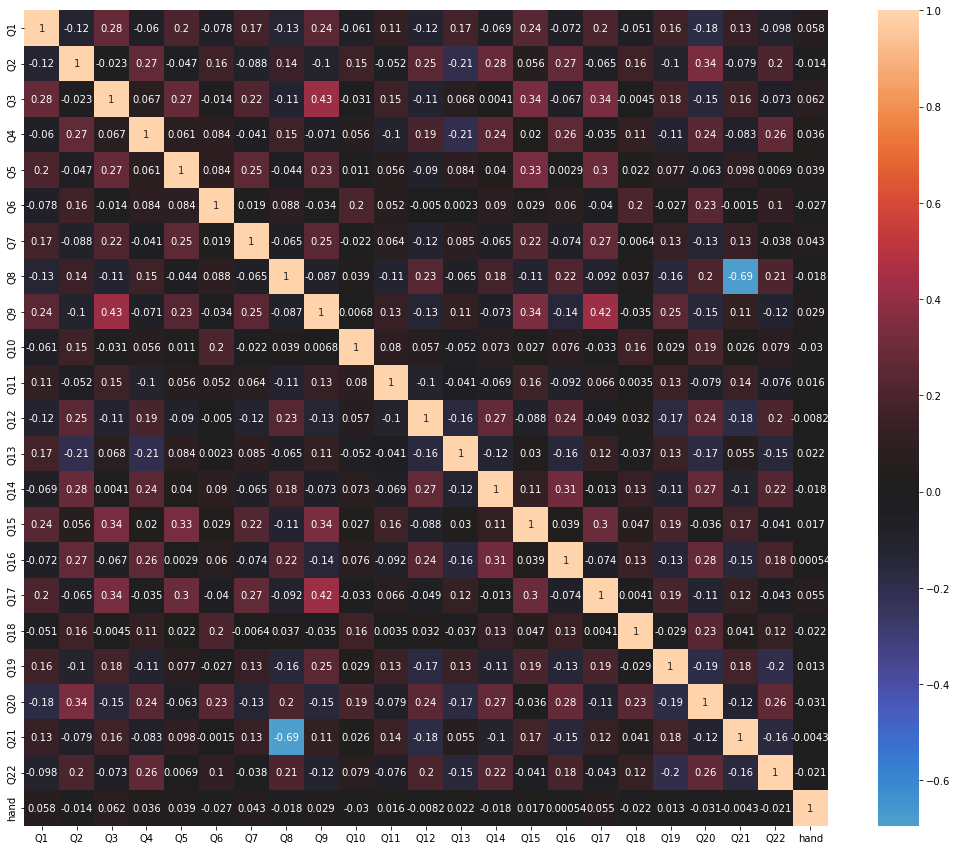

In [47]:
plt.figure(figsize=(18, 15))
sns.heatmap(pd.concat([data.iloc[:,:22], data['hand']], axis=1).corr(), annot=True, center=0)

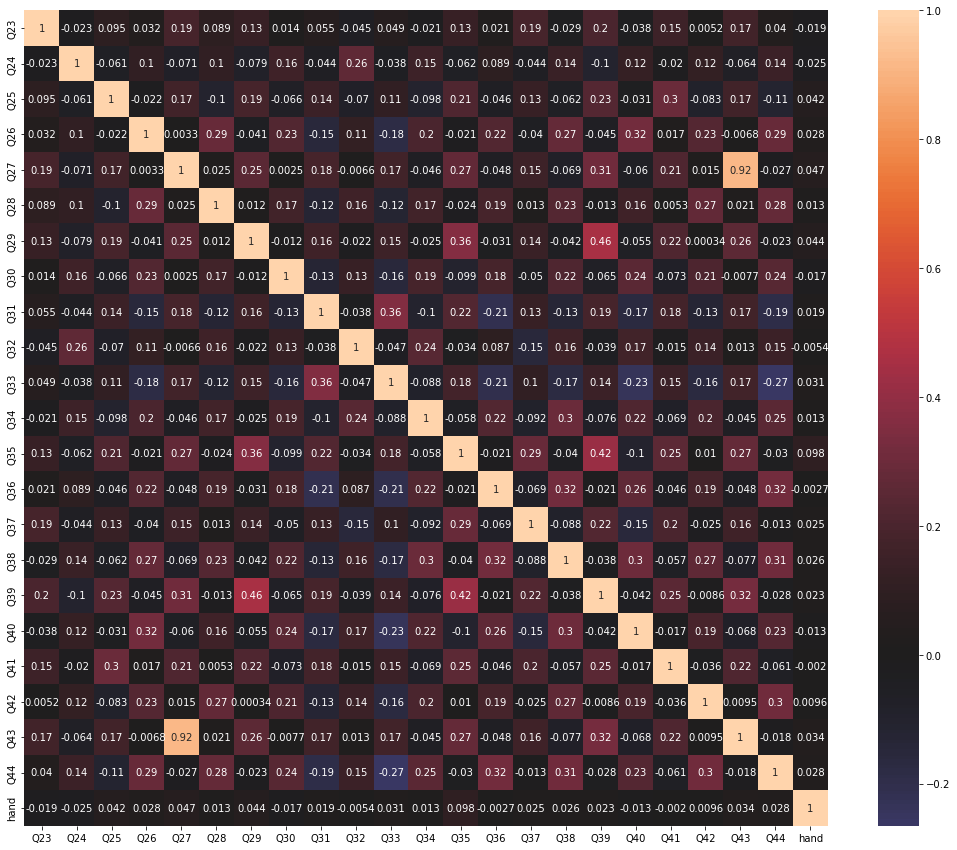

In [50]:
plt.figure(figsize=(18, 15))
sns.heatmap(pd.concat([data.iloc[:,22:44], data['hand']], axis=1).corr(), annot=True, center=0);

Not seeing any strong correlations between the questions and hand, but maybe it is because we have not categorized results. Right hand is also the majority of people. Could lead to some oddities

<AxesSubplot:title={'center':'Left Handedness'}, xlabel='hand', ylabel='Count'>

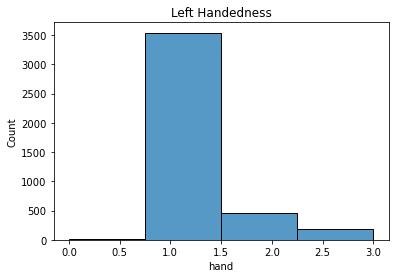

In [77]:
plt.title('Left Handedness')
sns.histplot(data=data, x='hand', bins=4)

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification. Hand is on a scale of 0-3, but being left handed (2) is not twice the value of being right handed (1).

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: KNN uses euclidean distance, so standardizing the distance is important because all features will be pulling the prediction in various directions. Our strange testelapse & introlapse data points with high extremes need to be normalized.

### 7. Give an example of when we might not standardize our variables.

Answer: If we have normal distributions and no significant outliers. Also if we want certain features to have a stronger affect on the prediction.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: Yes, absolutely. Our strange testelapse & introlapse data points with high extremes need to not overpower our prediction.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

In [153]:
import numpy as np

In [154]:
data['hand'].value_counts()

1    3541
2     452
3     178
0      10
Name: hand, dtype: int64

In [165]:
data = data[(data['hand'] != 3) & (data['hand'] != 0)].copy()

In [155]:
# data['hand'] = data['hand'].map({1: 0, 2: 1, 3: 0, 0: 0})

In [166]:
data['hand'].value_counts()

1    3541
2     452
Name: hand, dtype: int64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: With a k of 4 we could have a tie. Its best to have an odd number of neighbors

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 7$, and one with $k = 9$.

> Instantiate and fit your models using GridSearchCV.

In [167]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

In [169]:
X = data.iloc[:,:44]
y = data['hand']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

knn = KNeighborsClassifier()
params = {'n_neighbors': [3, 5, 7, 9]}
gs = GridSearchCV(knn, param_grid=params)

gs.fit(X_train_sc, y_train)
knn_y_pred = gs.predict(X_test_sc)
gs.score(X_test_sc, y_test)

0.8838838838838838

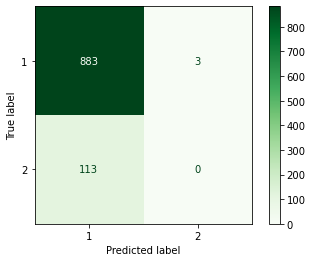

In [170]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred, cmap='Greens');

In [171]:
f1_score(y_test, knn_y_pred)    # model score

0.9383634431455898

In [173]:
f1_score(y_test, np.full_like(y_test, 2))    # null model score

0.0

### 12. How does a null model do? Create a null model. Does it do better than our best KNN model?

In [174]:
y_train.value_counts(normalize=True)

1    0.886774
2    0.113226
Name: hand, dtype: float64

In [110]:
# our model is performing 1.2% percent better than the null model. Probably noise.

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. 

Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: yes, the default is C = 1 which is the inverse of alpha

### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: due to the normalization of the data applied via C, it is less important to scale the data

### 15. Let's use logistic regression to predict whether the person is left-handed.


Be sure to use the same train/test split with your data as with your kNN model above!

Search over the following hyperparameters:

- l2 regularization with C = [.001, .01, .1, 1, 10, 100]


In [175]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=10_000)

params = {'C': [0.001, 0.01, .1, 1, 100]}
gs_lr = GridSearchCV(logreg, param_grid=params)

gs_lr.fit(X_train, y_train)
lr_y_pred = gs_lr.predict(X_test)

print(gs_lr.score(X_test, y_test))

0.8868868868868869


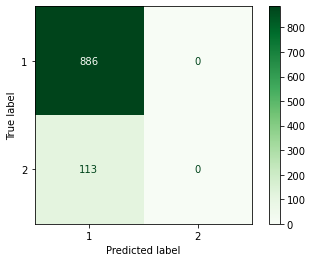

In [176]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, cmap='Greens');

In [177]:
f1_score(y_test, lr_y_pred)

0.940053050397878

---
## Step 5: Evaluate the model(s).

### 16. Before calculating any score on your data, take a step back. 

Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: Our X variables are not great predictors of our Y. The correlation matrix we had earlier showed almost not connection between any of our X's and our y.

### 17. Using accuracy as your metric, evaluate the best of your models on both the training (mean validation) and testing sets. Put your scores below. 

Answer: Null accuracy: 88.6774, KNN accuracy: 88.388, LR accuracy: 88.6886 .. according to accuracy, our logistic regression model is the best, but none of them are great.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: yes as our K increases, so does our bias. Variance is the inverse.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: Increase k. Stratify your y. Incrase your cross validation splits.

### 20. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: As C increases, the regularization decreases. Therefore the smaller C is the more bias you are adding to your model. C is the inverse of alpha.

### 21. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: As regularization increases our coef should converge upon each other.

### 22. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: Add more regularization. Cross validate your model fit. Increase the size of your test split.

### 23. How might you deal with the imbalanced dataset?

Answer: Stratify the y of the testing data on the train_test_split

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: I would think logistic regression would be more effective. KNN implies all factors are essentially equal. Logistic regression can reduce certain features more than others.

### 25. Instantiate, fit, and score a logistic regression model with no regularization. Interpret the coefficient for `Q1`.

In [137]:
from sklearn.linear_model import LogisticRegression
logreg_q1 = LogisticRegression(random_state=42, max_iter=10_000, penalty='none')

logreg_q1.fit(X_train, y_train)
q1_y_pred = logreg_q1.predict(X_test)
logreg_q1.coef_

array([[ 0.01499655, -0.0060294 ,  0.06106828,  0.01672322,  0.05238717,
        -0.0633871 ,  0.01796662, -0.10789915, -0.06277325, -0.02876528,
         0.00792614,  0.02096567, -0.03244577, -0.05389859, -0.04255111,
         0.0407445 ,  0.04904104, -0.01433795,  0.00050018, -0.00647282,
        -0.0634221 , -0.08210121, -0.07979868,  0.00089522,  0.08493277,
         0.08247406,  0.18995682,  0.03015022,  0.03787694, -0.00989701,
        -0.02759748, -0.00754036,  0.06330923,  0.00699243,  0.12682335,
        -0.03177285,  0.01022066,  0.01949363, -0.10389742,  0.01324877,
        -0.0315806 , -0.04995091, -0.22596086,  0.04040256]])

Answer: As Q1 increases by 1 we see a 1.5% increase in left handedness.

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but often need to pick one, even if it's an ensemble of models.  It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: Logistic regression had the best f1 & accuracy score.. But if I had to choose the best and simplest model, I would select the null model. None of the models we built had a significant impact on the predictions.

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer: Using our null model, Q2 has **zero** affect on predicting left handedness.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
